In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # 2sample test
from scipy.stats import f_oneway# anova more than 2 samples
from scipy.stats import levene# for  variane
from statsmodels.graphics.gofplots import qqplot
import os
from scipy.stats import chi2_contingency
from scipy.stats import spearmanr
from scipy.stats import kruskal

In [29]:
os.listdir(".")

['.ipynb_checkpoints', 'bike_sharing.csv', 'Untitled.ipynb']

In [30]:
df=pd.read_csv('bike_sharing.csv')

# 1. Define Problem Statement and perform Exploratory Data Analysis  

## 1.1 Definition of problem (as per given problem statement with additional views)

Yulu has recently suffered considerable dips in its revenues.They Want to understand the factors on which demand depends.
They want to understand the factors affecting the demand for these shared electric cycles in the Indian market.Do 2sample,ANOVA,CHi-squared tests and check is there statistical significance given that underlying assumption of the test are satisfied.

## 1.2 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.

In [7]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
print(df.shape)

(10886, 12)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
df["count"].describe(percentiles=[.25, .5, .75])

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [12]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
#unique attributes count
for i in df.columns:
    print(i)
    print("unique attributes:",df[i].nunique())
    df_col=df[i].value_counts().reset_index()
    df_col.columns=[i,"count"]
    print(df_col)
    print("------------------------")
    print("------------------------")

datetime
unique attributes: 10886
                  datetime  count
0      2012-12-11 13:00:00      1
1      2011-09-14 20:00:00      1
2      2011-05-05 22:00:00      1
3      2011-09-19 08:00:00      1
4      2012-06-04 03:00:00      1
...                    ...    ...
10881  2012-12-09 12:00:00      1
10882  2012-10-05 16:00:00      1
10883  2012-03-19 22:00:00      1
10884  2011-03-08 03:00:00      1
10885  2012-05-10 10:00:00      1

[10886 rows x 2 columns]
------------------------
------------------------
season
unique attributes: 4
   season  count
0       4   2734
1       3   2733
2       2   2733
3       1   2686
------------------------
------------------------
holiday
unique attributes: 2
   holiday  count
0        0  10575
1        1    311
------------------------
------------------------
workingday
unique attributes: 2
   workingday  count
0           1   7412
1           0   3474
------------------------
------------------------
weather
unique attributes: 4
   weather  

## 1.3 Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables

In [20]:
def getDistplot(df,colName):
    plt.figure(figsize=(10,5))
    sns.distplot(df[colName],norm_hist=True)
    plt.grid()
    plt.title("Distribution of count by {}".format(colName))
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

def getcountplot(df,colName):
    plt.figure(figsize=(10,5))
    sns.countplot(x=df[colName],data=df,order=df[colName].value_counts().index)
    plt.grid()
    plt.title("Count by {}".format(colName))
#     plt.ticklabel_format(style='plain', axis='x')
#     plt.ticklabel_format(style='plain', axis='y')
    plt.show()
    
def gethistplot(df,colName,hue,bins="auto"):
    plt.figure(figsize=(20,5))
    sns.histplot(x=colName,data=df,bins=bins,hue=hue)
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')
    plt.grid()
    plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1000x500 with 0 Axes>

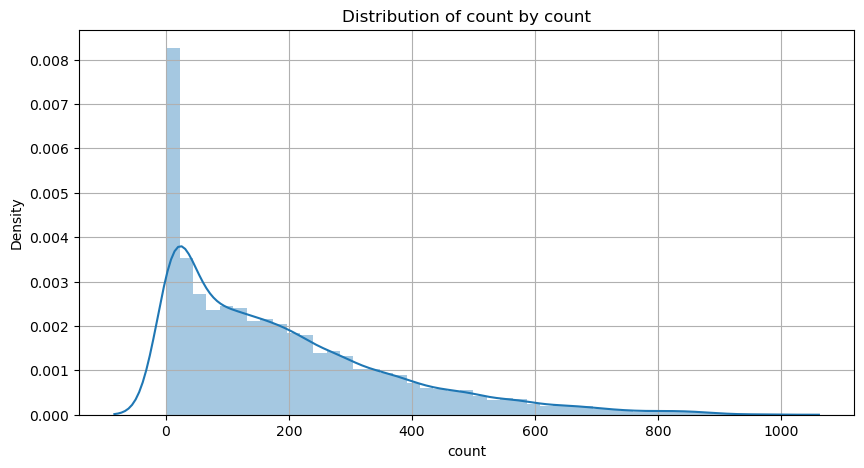

In [16]:
getDistplot(df,"count")

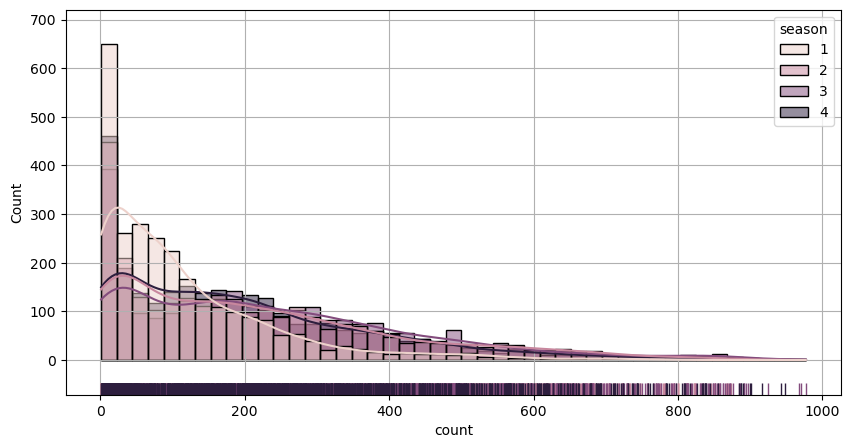

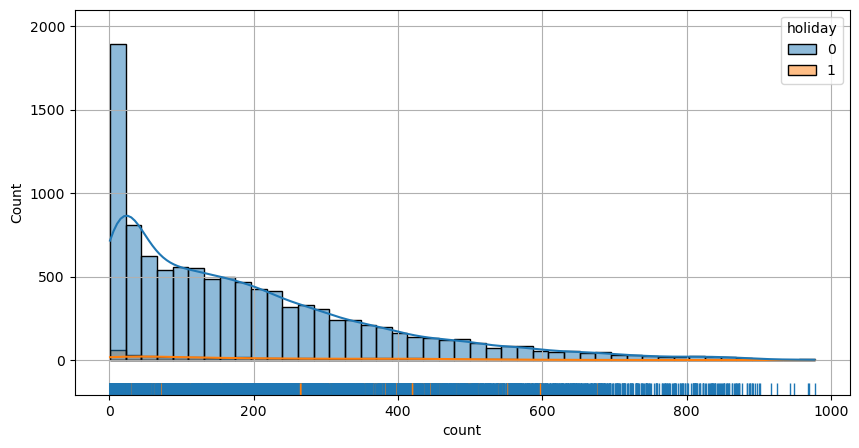

C:\Users\akash\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


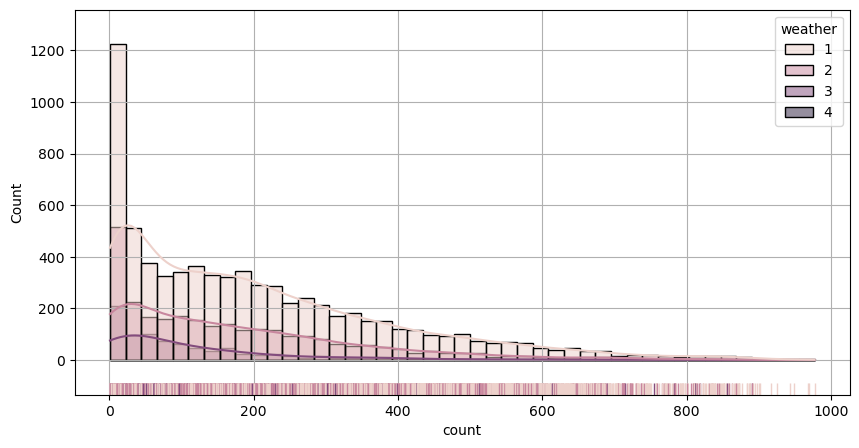

In [17]:
for i in ["season","holiday","weather"]:
    plt.figure(figsize=(10,5))
    sns.rugplot(x='count', data=df, height=.03,hue=i)
    sns.histplot(x='count', data=df, kde=True,hue=i,linewidth=1)
    plt.ticklabel_format(style='plain', axis='x')
    plt.grid()
    plt.show()

## scatter plots , numeric vs Numeric

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


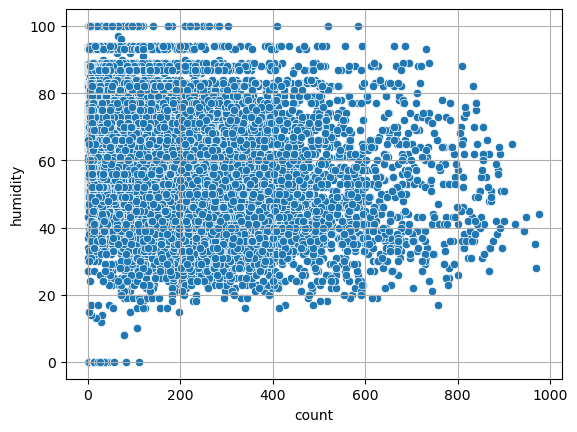

In [28]:
#count and humidity
sns.scatterplot(df["count"],df["humidity"])
plt.grid()
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


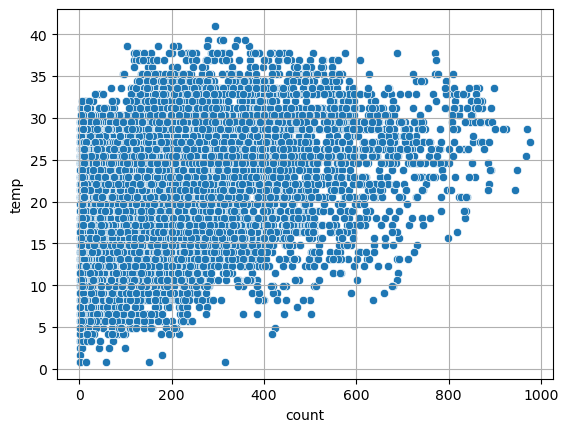

In [31]:
#count and temp
sns.scatterplot(df["count"],df["temp"])
plt.grid()
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


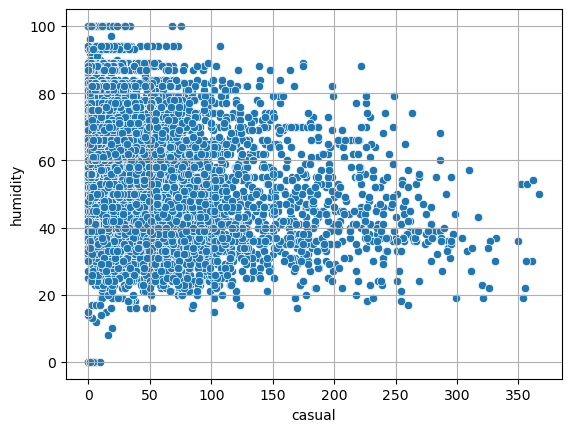

In [35]:
#casual and humidity
sns.scatterplot(df["casual"],df["humidity"])
plt.grid()
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


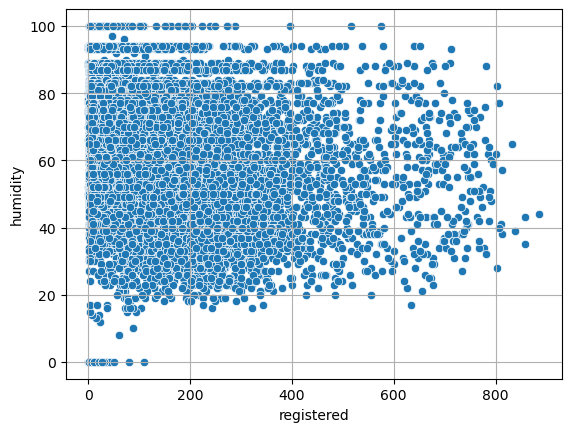

In [36]:
#registered and humidity
sns.scatterplot(df["registered"],df["humidity"])
plt.grid()
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


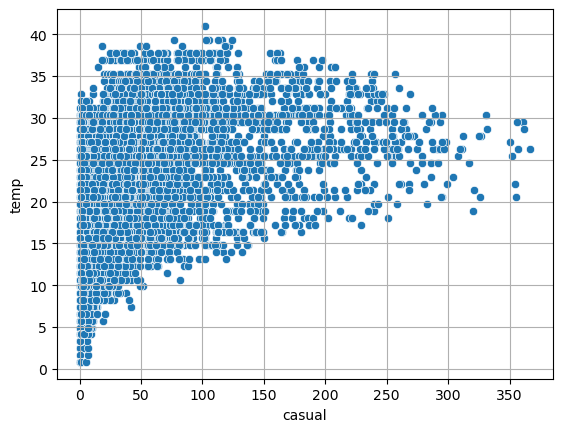

In [37]:
#casual and temp
sns.scatterplot(df["casual"],df["temp"])
plt.grid()
plt.show()

C:\Users\akash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


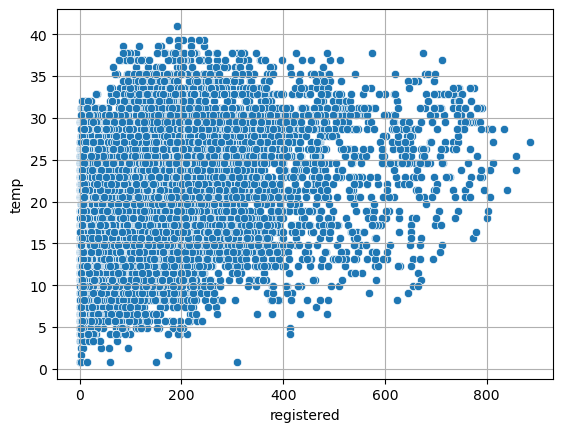

In [38]:
#registered and temp
sns.scatterplot(df["registered"],df["temp"])
plt.grid()
plt.show()

## Numeric vs Numeric Correlation

In [53]:
#H0: NUll hypothes is two sets of data are linearly uncorrelated
#ha: Alternate hypothesis are two sets of data are correlated

for i in ["temp","humidity","windspeed"]:
    # calculate spearman's correlation
    coef, p = spearmanr(df[i], df["count"])
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    print("data1: {} , data2 : {}".format(i,"count"))
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
         print('Samples are correlated (reject H0) p=%.3f' % p)
    print("="*50)

Spearmans correlation coefficient: 0.408
data1: temp , data2 : count
Samples are correlated (reject H0) p=0.000
Spearmans correlation coefficient: -0.354
data1: humidity , data2 : count
Samples are correlated (reject H0) p=0.000
Spearmans correlation coefficient: 0.136
data1: windspeed , data2 : count
Samples are correlated (reject H0) p=0.000


## count plots for categorical columns

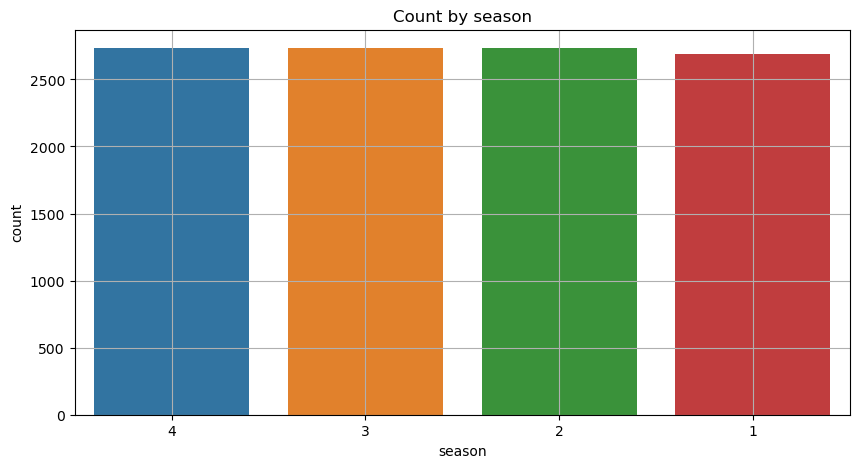

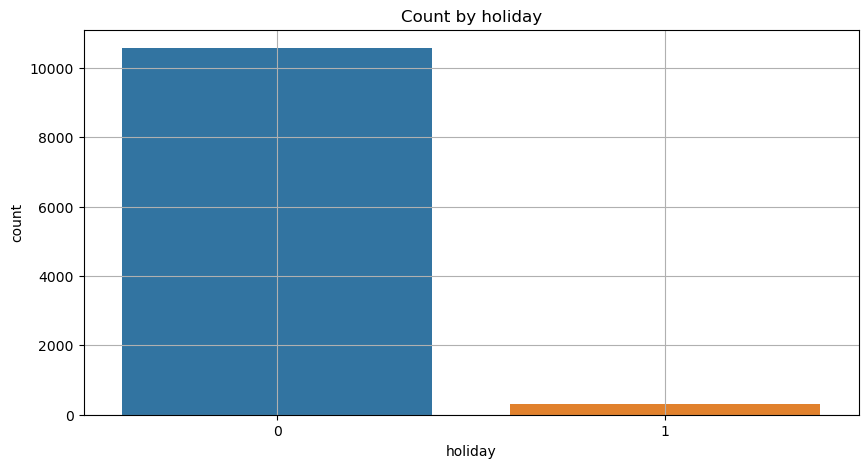

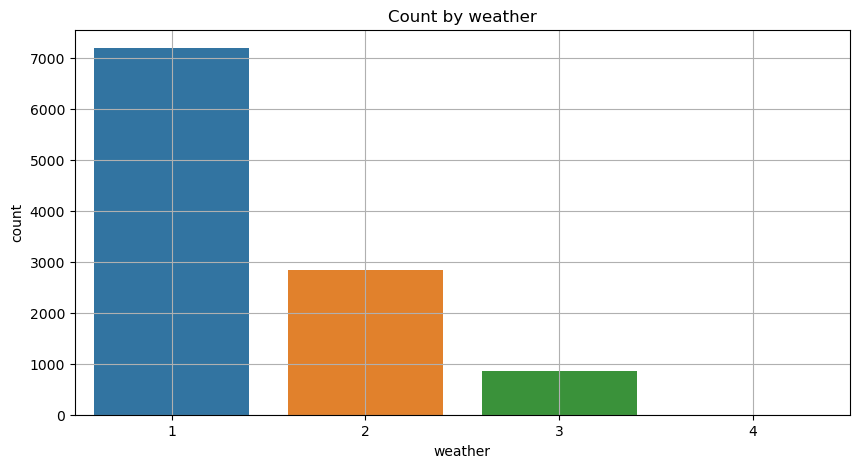

In [21]:
for i in ["season","holiday","weather"]:
    getcountplot(df,i)

## Correlation plot

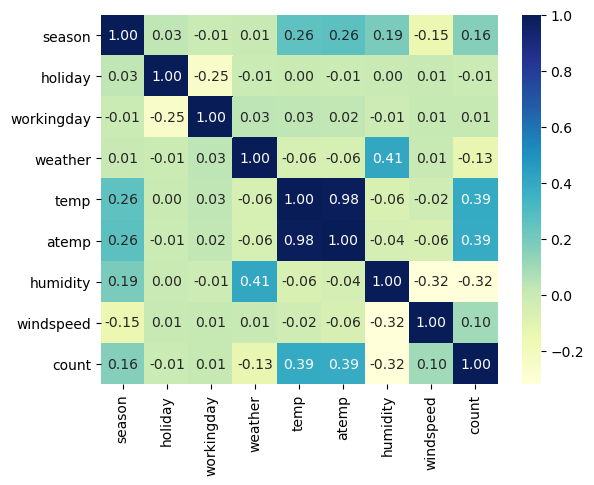

In [25]:
dfcopy=df[["season","holiday","workingday","weather","temp","atemp","humidity","windspeed","count"]]
sns.heatmap(dfcopy.corr(),cmap="YlGnBu",annot=True,fmt="0.2f")
plt.show()

### There is high correlation of season and temperature with count

## Boxplot for outliers check and range of values for each category

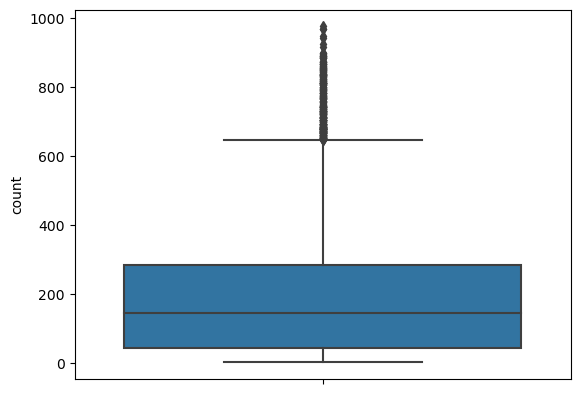

In [26]:
#count
sns.boxplot(y=df["count"],data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Scenarions where IQR is exceeded and columns contribution towards it

In [54]:
Q1=np.percentile(df["count"],25)
Q3=np.percentile(df["count"],75)
highRent=df[df["count"]>=Q3+1.5*(Q3-Q1)]

647.0

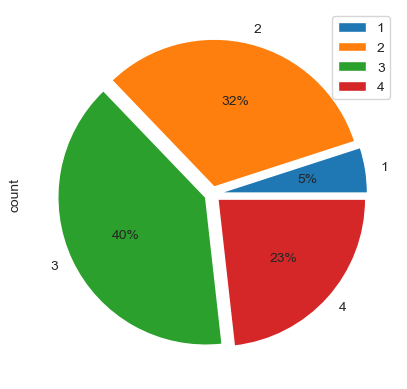

In [57]:
explode = (0.05,)*highRent["season"].nunique()
highRent.groupby(["season"]).aggregate({"count":"sum"}).plot(kind='pie',explode=explode, y='count',autopct='%1.0f%%')
plt.show()

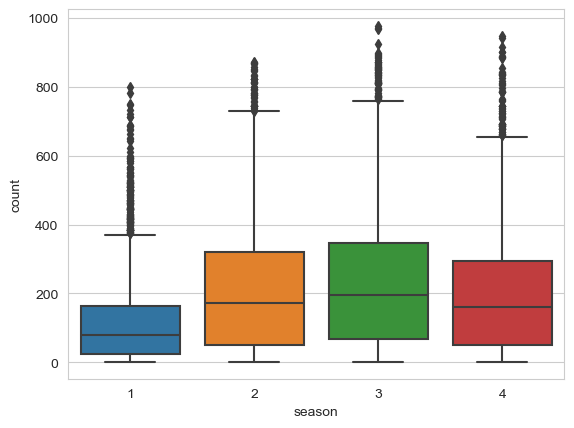

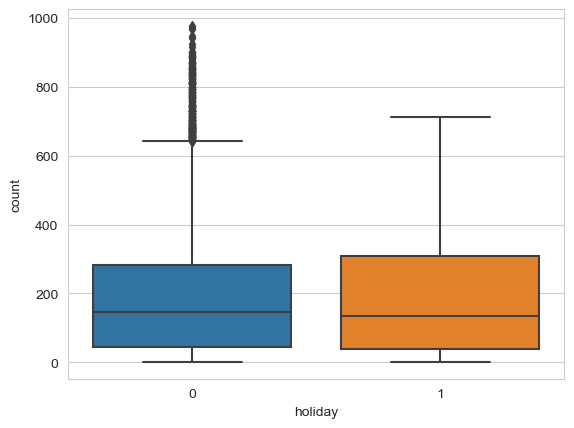

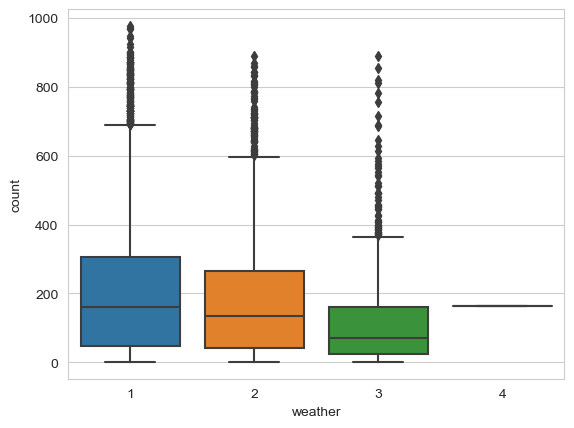

In [27]:
for i in ["season","holiday","weather"]:
    sns.set_style("whitegrid")
    sns.boxplot(x=df[i],y=df["count"])
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

## Season wise count of cycles Rented

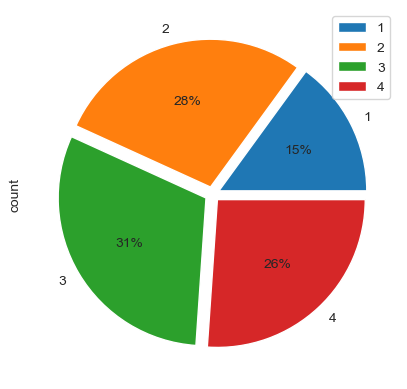

In [35]:
explode = (0.05,)*df["season"].nunique()
df.groupby(["season"]).aggregate({"count":"sum"}).plot(kind='pie',explode=explode, y='count',autopct='%1.0f%%')
plt.show()

## holiday wise no. of cycles rented

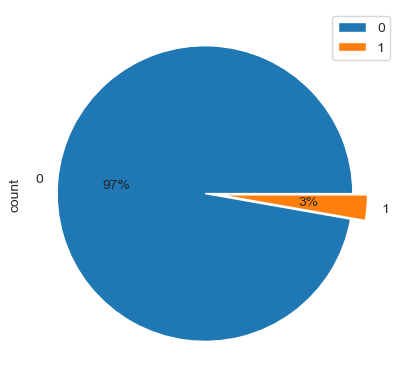

In [36]:
explode = (0.05,)*df["holiday"].nunique()
df.groupby(["holiday"]).aggregate({"count":"sum"}).plot(kind='pie',explode=explode, y='count',autopct='%1.0f%%')
plt.show()

## Working day wise no. of cycles rented

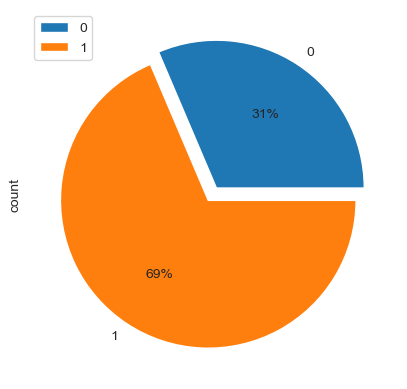

In [37]:
explode = (0.05,)*df["workingday"].nunique()
df.groupby(["workingday"]).aggregate({"count":"sum"}).plot(kind='pie',explode=explode, y='count',autopct='%1.0f%%')
plt.show()

## weather wise no. of cycles rented

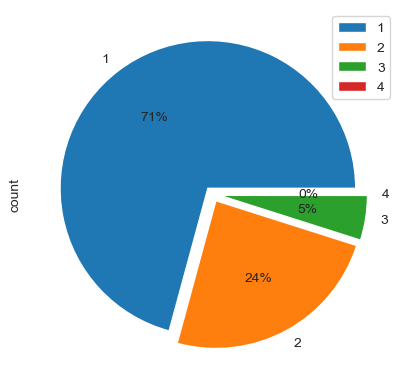

In [40]:
explode = (0.05,)*df["weather"].nunique()
df.groupby(["weather"]).aggregate({"count":"sum"}).plot(kind='pie',explode=explode, y='count',autopct='%1.0f%%')
plt.show()

## Illustrate the insights based on EDA 

1. Data has 10886 rows and 12 columns
2. All the columns of data are either int or float except datetime
3. stats for count column:
    count    10886.000000
    mean       191.574132
    std        181.144454
    min          1.000000
    25%         42.000000
    50%        145.000000
    75%        284.000000
    max        977.000000
4. The are no Null Values Present in the dataset.
5. Column wise unique values Analysis:
    a. Datetime: Has total of 10886 values, data is broken down into hourly format.
    b. Season: Has 4 unique values (1,2,3,4) which are equally distributes.
    c. holiday: Has 2 unique values (0,1).
    d. Workingday: Has 2 unique values (0,1).
    e. weather: Has 4 unique values (1,2,3,4) There is only 1 data point for weather=4
    f. temp,atemp,humidity,windspeed,casual,registered,count all are numerical variables.
6. The plot for count of no. of bikes is right skewed.
7. Data is equally distributed amoungst all the 4 seasons
8. only 3% of the time cycles are rented on holiday.
9. 69% of the time cycle is rented on working Day.
10. 71% of the time when weather is Clear, Few clouds, partly cloudy, partly cloudy cycles are rented.
11. During Snow,Rain,thundrstorm the bikes rent percentage is extremely low.
12. If we go by the formula of outlier detection (Q3+(1.5*(Q3-Q1))) 647 is the threshold.
13. There are 300+ occassions where the 647 threshold is being exceeded
14. In these 300+ occassions 40% of contribution came from season Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds season.

# 2. Hypothesis Testing :

### 2.1      2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented 

### Setting up Null and Alternate hypothesis

In [100]:
#Ho-> bike rent count on working and non working day is same
#Ha-> bike rent count on working and non working day is not same
# lets assume the alpha to be 0.05, or 95% confidence

In [118]:
weekend=df[df["workingday"]==0]["count"]
workingDay=df[df["workingday"]==1]["count"]

testStats,pValue=ttest_ind(workingDay,weekend)
print("pValue: ",pValue)
print("tstats: ",testStats)
print("When used 5% significance level")
if pValue<0.05:
    print("Reject Null hypothesis")
    print("bike rent count on working and non working day is not same")
else:
    print("accept Null hypothesis")
    print("bike rent count on working and non working day is same")
    
print("=======================================")
    
print("When used 10% significance level")
if pValue<0.1:
    print("Reject Null hypothesis")
    print("bike rent count on working and non working day is not same")
else:
    print("accept Null hypothesis")
    print("bike rent count on working and non working day is same")

pValue:  0.22644804226361348
tstats:  1.2096277376026694
When used 5% significance level
accept Null hypothesis
bike rent count on working and non working day is same
When used 10% significance level
accept Null hypothesis
bike rent count on working and non working day is same


### 2.2 ANNOVA to check if No. of cycles rented is similar or different in different 1. weather 2. season

For Anova test there are few assumptions that needs to be considered
1. Data should be Gaussian

    We will first use qqplot to see data is gaussian distributed or not later on we will use tests like shapiro and KSTEST
    
    
    
2. Equal Variance in each group:

    We will use levene for this

### 2.2.1  weather

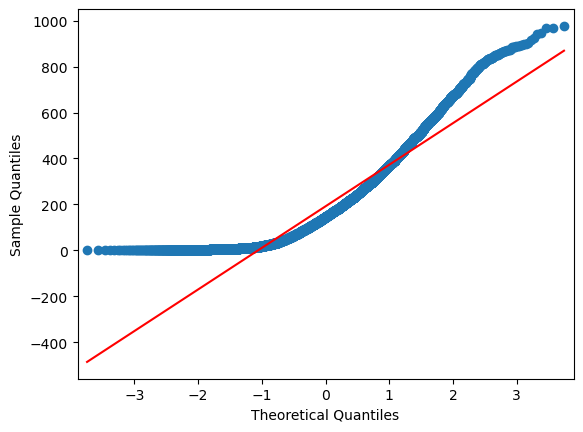

In [52]:
qqplot(df["count"],line="s")

### Taking sample size of 200 and using Shapiro test

In [53]:
sample=df["count"].sample(200)

In [54]:
#h0: Data is Gaussian distributed
#h1: Data is not gaussian distributed
#significance level alpha=0.05

testStat,Pvalue=shapiro(sample)
print(Pvalue)
if Pvalue<0.05:
    print("Reject Null")
    print("Data is not Gaussian")
else:
    print("Fail to reject null hypothesis")
    print("Data is Gaussian")

7.849990622810221e-12
Reject Null
Data is not Gaussian


### using KSTest

In [55]:
test_stat,pValue=kstest(sample,
       norm.cdf,
       args=(sample.mean(),sample.std()))

print(pValue)
#significance level alpha=0.05
if pValue<0.05:
    print("Reject Null")
    print("Data is not Gaussian")
else:
    print("Fail to reject null hypothesis")
    print("Data is Gaussian")

0.00033125168608620105
Reject Null
Data is not Gaussian


### Using levene test for checking equal variance amoungst groups

In [120]:
sample1 = df[df["weather"]==1]["count"]
sample2 = df[df["weather"]==2]["count"]
sample3 = df[df["weather"]==3]["count"]
sample4 = df[df["weather"]==4]["count"]

print("sample1 mean: {},std: {}".format(sample1.mean(),sample1.std()))
print("sample2 mean: {},std: {}".format(sample2.mean(),sample2.std()))
print("sample3 mean: {},std: {}".format(sample3.mean(),sample3.std()))
print("sample4 mean: {},std: {}".format(sample4.mean(),sample4.std()))

#h0: all samples have same variance
#h1: variance are not same for all samples

#significance level alpha=0.05

tstat,pValue=levene(sample1,sample2,sample3,sample4)
print(pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
else:
    print("accept Null hypothesis")

sample1 mean: 205.23679087875416,std: 187.9595660313148
sample2 mean: 178.95553987297106,std: 168.36641290145076
sample3 mean: 118.84633294528521,std: 138.58129705235916
sample4 mean: 164.0,std: nan
3.504937946833238e-35
Reject Null hypothesis


In [142]:
sample1 = df[df["season"]==1]["count"]
sample2 = df[df["season"]==2]["count"]
sample3 = df[df["season"]==3]["count"]
sample4 = df[df["season"]==4]["count"]

print("sample1 mean: {},std: {}".format(sample1.mean(),sample1.std()))
print("sample2 mean: {},std: {}".format(sample2.mean(),sample2.std()))
print("sample3 mean: {},std: {}".format(sample3.mean(),sample3.std()))
print("sample4 mean: {},std: {}".format(sample4.mean(),sample4.std()))

#h0: all samples have same variance
#h1: variance are not same for all samples

#significance level alpha=0.05

tstat,pValue=levene(sample1,sample2,sample3,sample4)
print(pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
else:
    print("accept Null hypothesis")

sample1 mean: 116.34326135517499,std: 125.27397388810316
sample2 mean: 215.25137211855105,std: 192.00784313546254
sample3 mean: 234.417124039517,std: 197.15100053680402
sample4 mean: 198.98829553767374,std: 177.62240938763685
1.0147116860043298e-118
Reject Null hypothesis


## Since neither of the condition is satisying we can't perform Anova test but just checking what will be the results from Anova test

## 1. weather

In [143]:
#setting Null hypothesis
#h0: For all weather number of cycles rented are similar
#h1: For all weather number of cycles rented are not similar

#significance level alpha=0.05

sample1 = df[df["weather"]==1]["count"]
sample2 = df[df["weather"]==2]["count"]
sample3 = df[df["weather"]==3]["count"]
sample4 = df[df["weather"]==4]["count"]

tstat,pValue=f_oneway(sample1,sample2,sample3,sample4)
print(pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
    print("For all weather number of cycles rented are not similar")
else:
    print("accept Null hypothesis")
    print("For all weather number of cycles rented are similar")

5.482069475935669e-42
Reject Null hypothesis
For all weather number of cycles rented are not similar


### 2. Season

In [144]:
#setting Null hypothesis
#h0: For all weather number of cycles rented are similar
#h1: For all weather number of cycles rented are not similar

#significance level alpha=0.05

sample1 = df[df["season"]==1]["count"]
sample2 = df[df["season"]==2]["count"]
sample3 = df[df["season"]==3]["count"]
sample4 = df[df["season"]==4]["count"]

tstat,pValue=f_oneway(sample1,sample2,sample3,sample4)
print(pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
    print("For all season number of cycles rented are not similar")
else:
    print("accept Null hypothesis")
    print("For all season number of cycles rented are similar")

6.164843386499654e-149
Reject Null hypothesis
For all weather number of cycles rented are not similar


## kruskal

### The p-value for the test using the assumption that H has a chi square distribution.

In [145]:
sample1 = df[df["weather"]==1]["count"]
sample2 = df[df["weather"]==2]["count"]
sample3 = df[df["weather"]==3]["count"]
sample4 = df[df["weather"]==4]["count"]

#setting Null hypothesis
#h0: For all weather number of cycles rented are similar
#h1: For all weather number of cycles rented are not similar

#significance level alpha=0.05

tstat,pValue=kruskal(sample1,sample2,sample3,sample4)
print(pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
    print("For all weather number of cycles rented are not similar")
else:
    print("accept Null hypothesis")
    print("For all weather number of cycles rented are similar")

3.501611300708679e-44
Reject Null hypothesis
For all weather number of cycles rented are not similar


In [146]:
#setting Null hypothesis
#h0: For all weather number of cycles rented are similar
#h1: For all weather number of cycles rented are not similar

#significance level alpha=0.05

In [147]:
sample1 = df[df["season"]==1]["count"]
sample2 = df[df["season"]==2]["count"]
sample3 = df[df["season"]==3]["count"]
sample4 = df[df["season"]==4]["count"]


tstat,pValue=kruskal(sample1,sample2,sample3,sample4)

print("pValue",pValue)
if pValue<0.05:
    print("Reject Null hypothesis")
    print("For all season number of cycles rented are not similar")
else:
    print("accept Null hypothesis")
    print("For all season number of cycles rented are similar")

pValue 2.479008372608633e-151
Reject Null hypothesis
For all season number of cycles rented are not similar


## chisquared Test

### weather is dependent on season

In [130]:
#Setting Null and alternate hypothesis
#h0: weather is dependent on season
#ha: weather is not dependent on season

#significance level alpha=0.05

In [132]:
seasWeather=pd.crosstab(index=df["weather"],columns=df["season"])

tstat,pValue,dof,expected_freq=chi2_contingency(seasWeather)
print("pValue: ",pValue)
print("tstat: ",tstat)

if pValue<0.05:
    print("Reject Null hypothesis")
    print("weather is not dependent on season")
else:
    print("accept Null hypothesis")
    print(" weather is dependent on season")

pValue:  1.5499250736864862e-07
tstat:  49.15865559689363
Reject Null hypothesis
weather is not dependent on season


### The Assumption of chisquared test is that expected values should be greater than 5.But here in this case:

In [133]:
expected_freq

array([[1.77454639e+03, 1.80559765e+03, 1.80559765e+03, 1.80625831e+03],
       [6.99258130e+02, 7.11493845e+02, 7.11493845e+02, 7.11754180e+02],
       [2.11948742e+02, 2.15657450e+02, 2.15657450e+02, 2.15736359e+02],
       [2.46738931e-01, 2.51056403e-01, 2.51056403e-01, 2.51148264e-01]])

### for last row it is not, the assumption of this test has failed

# Recommendation

1. Stocking up cycles in Clear, Few clouds, partly cloudy, partly cloudy weather because the dimand is high during these time.
2. Stocking of cycles near coorporate office during workday.
3. There is absolutely zero demand of cycles during Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.These weather should be considered as off season, comapny needs to see alternative approach other than rented cycle during these times.

# Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

From statistical Tests we came to know that For all weathers number of cycles rented are not similar.

Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog weather has least demand.

 Clear, Few clouds, partly cloudy, partly cloudy has most demand.
 
 For all seasons as well no. of cycles rented are not similar